<a href="https://colab.research.google.com/github/ineslca/workbooks/blob/main/W2%2C_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quantitative Methods 2: Data Science and Visualisation

## Workshop 2: Working With Data In Pandas
In this workshop, our aim is to get used to working with more complex data that we've imported from external files. We'll start to graph it, and to slice and dice it, to select the bits we're interested in.

We will work with *pandas* to manipulate the data, and to derive measures and graphs that tell us a bit more than what the source data files tell us.

### Aims

- Learn to import data to python using pandas
- Learn how access specific rows, columns and cells
- Plot the data
- Tidy up graphs to include axes

## Introduction

We are going to work with some UK income data. The income data is packaged as a .csv file. The Pandas package knows how to handle this and put the data in a DataFrame, as we've seen. Let's examine the data and start to see what we can say about it. First of all, we have to find data - I'm interested in looking in data with a wide spread, so I looked for data on income in the UK. 

This data is collected by the Office for National Statistics(ONS) : http://www.ons.gov.uk/ons/datasets-and-tables/index.html?pageSize=50&sortBy=none&sortDirection=none&newquery=income+percentile - but the exact data I want to see, income by percentile, is tricky to find. 

I ended up using data from 2011, generated from a study called the Family Resources Survey and collated and tweaked by an independent research unit called the Institute of Fiscal Studies (IFS). The "tweaking" they do tends to be around the size of the family unit, and other factors which create economies of scale - hence they "equivalise" it. The IFS is quoted in UK Government documents, so we can have some trust in their impartiality, or at least accuracy - of course, if we were publishing research about this, that's not really good enough and we'd want to reproduce, or at least understand and critique, their methodology rather than just trusting it!

e.g.:

http://www.ifs.org.uk/wheredoyoufitin/about.php

https://en.wikipedia.org/wiki/Equivalisation

## Downloading the Data

Let's grab our income data from our course website and save it into our data folder.  If you've not already created a data folder then do so using the following command.  Don't worry if it generates an error, that means you've already got a data folder.


In [ ]:
!mkdir data

In [ ]:
!mkdir data/wk2
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk2/incomes.csv -o ./data/wk2/incomes.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15154  100 15154    0     0  25597      0 --:--:-- --:--:-- --:--:-- 25554


In [ ]:
import pandas
import pylab
import matplotlib.pyplot as plt
# make the plots a little wider by default
%matplotlib inline
plt.style.use('ggplot')

pylab.rcParams['figure.figsize'] = (10., 8.)

In [ ]:
data_path = "./data/wk2/incomes.csv"

#index_col indicates column to use as the row labels of the dataframe, mentioned below
income =  pandas.read_csv(data_path, index_col=0)
income.head()

,"Net equivalised household income in 2010-11, week","Childless couple, annual income","Couple, two children under 14","Couple, three children under 14",Couple with one child under 14,Couple with two children aged 15 to 18,"Couple, two children under 14 plus dependent adult",Single adult,"Lone parent, one child under 14","Lone parent, two children under 14","Lone parent, two children aged 15-18",ANNOTATIONS,1979 to 1996-97,1996-97 to 2009-10,1996-97 to 2010-11
Percentile Point,,,,,,,,,,,,,,,
1,33.50,"1,746.92","2,445.69","2,795.08","2,096.31","2,899.89","3,022.18","1,170.44","1,519.82","1,869.21","2,323.41",NaN,NaN,NaN,NaN
2,98.60,"5,141.01","7,197.41","8,225.61","6,169.21","8,534.07","8,893.95","3,444.48","4,472.68","5,500.88","6,837.54",NaN,-0.20%,-1.30%,-0.50%
3,128.56,"6,703.11","9,384.36","10,724.98","8,043.74","11,127.17","11,596.39","4,491.09","5,831.71","7,172.33","8,915.14",NaN,0.40%,0.10%,0.10%
4,151.05,"7,875.75","11,026.05","12,601.20","9,450.90","13,073.75","13,625.05","5,276.75","6,851.90","8,427.05","10,474.75",NaN,0.50%,0.80%,0.60%
5,166.32,"8,671.91","12,140.68","13,875.06","10,406.30","14,395.38","15,002.41","5,810.18","7,544.57","9,278.95","11,533.65",NaN,0.70%,1.00%,0.90%


This is a simple dataframe - we see the percentile and an income. Note that I've told pandas to use the first column (the Percentile) as the index to make life easier.

The percentile tells us how people on that income rank - so the final category, 99% (which is really binned, so 99%<n$\leq$ 100%), is telling us how much "the 1%" earn. Let's find out:

In [ ]:
income.tail()

,"Net equivalised household income in 2010-11, week","Childless couple, annual income","Couple, two children under 14","Couple, three children under 14",Couple with one child under 14,Couple with two children aged 15 to 18,"Couple, two children under 14 plus dependent adult",Single adult,"Lone parent, one child under 14","Lone parent, two children under 14","Lone parent, two children aged 15-18",ANNOTATIONS,1979 to 1996-97,1996-97 to 2009-10,1996-97 to 2010-11
Percentile Point,,,,,,,,,,,,,,,
95,1075.73,"56,088.56","78,523.99","89,741.70","67,306.27","93,107.01","97,033.21","37,579.34","48,797.05","60,014.76","74,597.79",NaN,2.90%,2.00%,1.30%
96,1174.48,"61,237.18","85,732.05","97,979.49","73,484.61","101,653.72","105,940.32","41,028.91","53,276.35","65,523.78","81,445.45",NaN,3.00%,2.00%,1.40%
97,1302.74,"67,925.07","95,095.10","108,680.12","81,510.09","112,755.62","117,510.37","45,509.80","59,094.81","72,679.83","90,340.35",NaN,3.20%,2.20%,1.60%
98,1523.31,"79,425.23","111,195.32","127,080.36","95,310.27","131,845.88","137,405.64","53,214.90","69,099.95","84,984.99","105,635.55",NaN,3.20%,2.70%,1.70%
99,2090.35,"108,990.74","152,587.04","174,385.19","130,788.89","180,924.64","188,553.99","73,023.80","94,821.95","116,620.10","144,957.69",NaN,NaN,NaN,NaN


Well, they we have it - the 1% earn, on average, about £2000 a week. How does that compare to people in the 90% decile? We can access particular *rows* in a dataframe using **.loc[row index]**; because our index is the percentile point, we can just read it off:

In [ ]:
income.loc[90]

Net equivalised household income in 2010-11, week        845.54
Childless couple, annual income                       44,086.54
Couple, two children under 14                         61,721.15
Couple, three children under 14                       70,538.46
Couple with one child under 14                        52,903.85
Couple with two children aged 15 to 18                73,183.65
Couple, two children under 14 plus dependent adult    76,269.71
Single adult                                          29,537.98
Lone parent, one child under 14                       38,355.29
Lone parent, two children under 14                    47,172.60
Lone parent, two children aged 15-18                  58,635.10
ANNOTATIONS                                                 NaN
1979 to 1996-97                                           2.50%
1996-97 to 2009-10                                        1.70%
1996-97 to 2010-11                                        1.20%
Name: 90, dtype: object

We can also select a range of values with the "colon" notation. This will select the 90-95th percentiles, for example:

In [ ]:
income.loc[90:95]

,"Net equivalised household income in 2010-11, week","Childless couple, annual income","Couple, two children under 14","Couple, three children under 14",Couple with one child under 14,Couple with two children aged 15 to 18,"Couple, two children under 14 plus dependent adult",Single adult,"Lone parent, one child under 14","Lone parent, two children under 14","Lone parent, two children aged 15-18",ANNOTATIONS,1979 to 1996-97,1996-97 to 2009-10,1996-97 to 2010-11
Percentile Point,,,,,,,,,,,,,,,
90,845.54,"44,086.54","61,721.15","70,538.46","52,903.85","73,183.65","76,269.71","29,537.98","38,355.29","47,172.60","58,635.10",NaN,2.50%,1.70%,1.20%
91,876.63,"45,707.74","63,990.84","73,132.39","54,849.29","75,874.85","79,074.40","30,624.19","39,765.74","48,907.29","60,791.30",NaN,2.60%,1.70%,1.20%
92,911.29,"47,514.54","66,520.35","76,023.26","57,017.44","78,874.13","82,200.15","31,834.74","41,337.65","50,840.55","63,194.33",NaN,2.60%,1.80%,1.20%
93,957.14,"49,905.23","69,867.32","79,848.36","59,886.27","82,842.68","86,336.04","33,436.50","43,417.55","53,398.59","66,373.95",NaN,2.70%,1.80%,1.30%
94,1016.37,"52,993.38","74,190.73","84,789.40","63,592.05","87,969.00","91,678.54","35,505.56","46,104.24","56,702.91","70,481.19",NaN,2.90%,1.90%,1.30%
95,1075.73,"56,088.56","78,523.99","89,741.70","67,306.27","93,107.01","97,033.21","37,579.34","48,797.05","60,014.76","74,597.79",NaN,2.90%,2.00%,1.30%


## Accessing parts of a dataframe

If we want to extract the actual value instead of just the whole row, we need to reference the *column* as well as the row. In pandas, columns are referenced by **column name**:

In [ ]:
income['Net equivalised household income in 2010-11, week']

Percentile Point
1       33.50
2       98.60
3      128.56
4      151.05
5      166.32
       ...   
95    1075.73
96    1174.48
97    1302.74
98    1523.31
99    2090.35
Name: Net equivalised household income in 2010-11, week, Length: 99, dtype: float64

So, to access a particular cell, we tell Python the row and the column (this is pretty simple - the same way we tell excel to access cell "A34" meaning Column A, Row 34). One way we do that in pandas is to select the column, and then use .loc[] on the index.

In [ ]:
income['Net equivalised household income in 2010-11, week'].loc[90]

845.54

We've accessed row 90 of the column called 'Net equivalised household income in 2010-11, week'; can we access the data the other way around - can we first take the row and then specify a column? Let's try:

In [ ]:
income.loc[90]['Net equivalised household income in 2010-11, week']

845.54

Yes, this seems to be working fine.

### Extension

The reason for this is that selecting the column spits out a smaller dataframe, and all dataframes use  "loc", so we can use that. Another way to do this would be to use an explicit variable for the dataframe, along the lines of:

`smallDataFrame = income['Net equivalised household income in 2010-11, week']`  
`smallDataFrame.loc[90]`

by doing income

`['Net equivalised household income in 2010-11, week'].loc[90]`   

we're taking the "smallDataFrame" object as an implicit (or hidden) output

In [ ]:
#let's try
smaller = income['Net equivalised household income in 2010-11, week']
smaller.loc[90]

845.54

If we want to look at a few rows of data, we can use a range:

In [ ]:
income['Net equivalised household income in 2010-11, week'].loc[90:95]

Percentile Point
90     845.54
91     876.63
92     911.29
93     957.14
94    1016.37
95    1075.73
Name: Net equivalised household income in 2010-11, week, dtype: float64

In [ ]:
#or 
smaller.loc[90:95]

Percentile Point
90     845.54
91     876.63
92     911.29
93     957.14
94    1016.37
95    1075.73
Name: Net equivalised household income in 2010-11, week, dtype: float64

So, to recap, we can now access a particular **row** using *loc[index number]*, a particular **column** with the square brackets formalism *dataframename['column name']*, or both *dataframename['column name'].loc[index number]*. We've made a start at being able to get to the bits of data we need.

## Exercise: 
    
How do the equivalised incomes of single adults and childless couples compare? Look at the 1st, 99th and 50th percentile and summarise what this tells you about the value or price of coupling.

In [ ]:
income['Childless couple, annual income'].loc[1]

'1,746.92'

In [ ]:
income['Single adult'].loc[1]

'1,170.44'

In [ ]:
1746.92/1170.44
# meaning the income of childless couples represents 150% of that of a single adult

1.4925327227367486

In [ ]:
income['Childless couple, annual income'].loc[50]

'21,832.75'

In [ ]:
income['Single adult'].loc[50]

'14,627.95'

In [ ]:
21832.75/14627.95

1.4925365481834432

In [ ]:
income['Childless couple, annual income'].loc[90]

'44,086.54'

In [ ]:
income['Single adult'].loc[90]

'29,537.98'

In [ ]:
44086.54/29537.98

1.492537404385811

The income of childless couples is about 50% larger than the income of single adults for all three cases. Proportionally, this means that couples spend 25% more than single adults. 

## Examining the Distribution

Returning to the overall statistics, the 90% percentile earns less than half the top percentile ("the 1%"); if you're taking home over £800 as a household, you're in the top 10% of earners.

How does 
1. The income of "the 1%" compare with the mean and median across the population, as a proportion? 
2. How does the 1% compare with the 90th percentile (the 10%)? 
3. How does the 10% compare with the median and mean?

The 1% earn about 60 times the poorest groups in society - and we've made other comparisons. But that's not the whole story. Let's look at the income graph. 

In pandas, we can plot this fairly easily...

Text(0, 0.5, 'Income (Net, Equivalised) [GBP]')

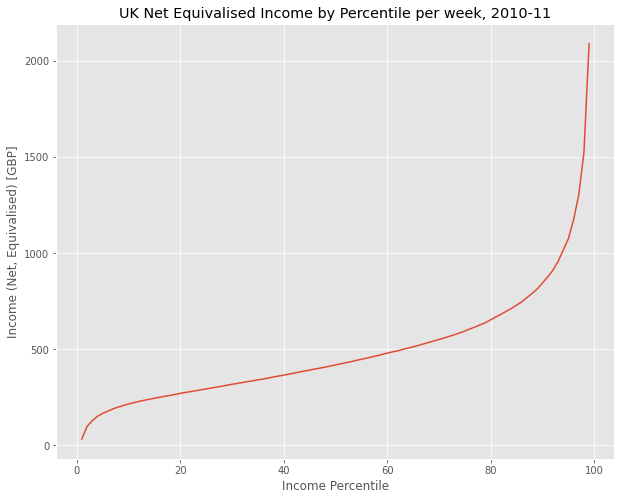

In [ ]:
income['Net equivalised household income in 2010-11, week'].plot()
plt.title('UK Net Equivalised Income by Percentile per week, 2010-11')
plt.xlabel('Income Percentile')
plt.ylabel('Income (Net, Equivalised) [GBP]')

We see a curve that is pretty linear in the middle region, but curves rapidly upwards in the higher percentile and looks more like a power law.

### Exercise: Means

Where does the mean appear here? Draw in a horizontal line to show the mean using **axhline**. Show the median on the same graph. What is the meaning of the median in this context?

Hint: Recall that last time we used *axvline* to highlight the mean and standard deviation by drawing vertical lines on the axis. Here, we use *axhline* to draw horizontal lines.

In [ ]:
income['Net equivalised household income in 2010-11, week'].mean()

490.0385858585859

Text(0, 0.5, 'Income (Net, Equivalised) [GBP]')

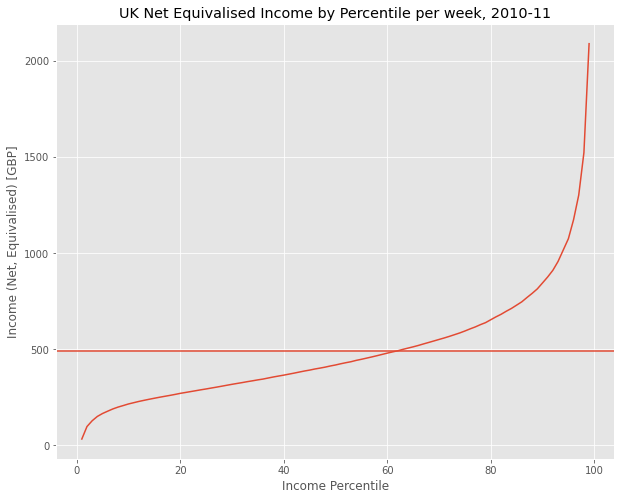

In [ ]:
income['Net equivalised household income in 2010-11, week'].plot()
# I could also write plt.axhline(490) but the following line of code allows for more precision
plt.axhline(income['Net equivalised household income in 2010-11, week'].mean())
plt.title('UK Net Equivalised Income by Percentile per week, 2010-11')
plt.xlabel('Income Percentile')
plt.ylabel('Income (Net, Equivalised) [GBP]')

### Extension: Accessing cells

There are a number of ways to access elements of the dataframe: we've shown how to access columns by the [*'name of column'*] method, and rows via the .loc[*index*] method; and how we can select a range. There are also .iloc methods to select by number rather than name; you should become familiar with these on the documentation page for pandas.

## Comparing segments

Earlier, we compared some summary statistics of single people and couples. Let's look at the wider curve for more than one group, now:

In [ ]:
#This is going to throw a load of errors
income[['Single adult','Lone parent, one child under 14']].plot()

TypeError: ignored

## Warning 

This isn't looking good. There's a load of text and no graph. If you've not seen this before, it's an error - something has gone wrong. Generally, if we look at the **final** line, it should tell us what's wrong, in this case there's "no numeric data to plot", which is weird, because we've seen the data and have even plotted some of it.

## Messy Data

DataFrames, as we are starting to see, give us the chance to plot, chop, slice and data to help us make sense of it. Here, we will create a **new** DataFrame to take only two columns of data, and get rid of any blank cells and any cells which are not being read as numbers - normally a sign of a missing value or a non-numerical character. Why could this be happening? It could be 

- due to blank spaces in the text file

- due to letters where there should be numbers

- due to characters (",", "-", etc) that shouldn't really be there

In general, there will be some detective work required to figure out what's wrong in our text file. Your best bet is sometimes to open up the data in a text editor, like I've done here:

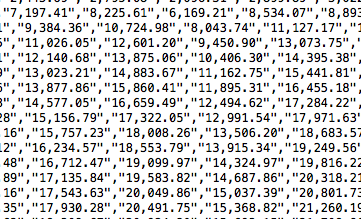

In [ ]:
from IPython.display import Image

data_path = "https://s3.eu-west-2.amazonaws.com/qm2/wk2/data.png"
Image(data_path)

That's a screenshot of our datafile, opened up in a text editor. As we can see, these numbers are separated by commas and surrounded by quotation marks - this is normal, and what .csv files are supposed to look like. However, there are a lot of commas within the numbers - which makes it easier for people to read, but confuses software. Luckily, Python has a method for dealing with this - the "replace" method. 

Unfortunately, this dataframe is quite messy, so I'm going to have to extract just the columns of data I'm interested in to make it work. I'll do that by creating a new dataframe:

## Example: Cleaning data

In [ ]:
clean = income[['Childless couple, annual income','Couple, two children under 14']]
clean.head()

,"Childless couple, annual income","Couple, two children under 14"
Percentile Point,,
1,"1,746.92","2,445.69"
2,"5,141.01","7,197.41"
3,"6,703.11","9,384.36"
4,"7,875.75","11,026.05"
5,"8,671.91","12,140.68"


We see those pesky commas. Now we can get on with cleaning up the data:

In [ ]:
clean=clean.replace(',', '', regex=True)

# In addition, missing values are sometimes written as '-', in order for Python to understand that it is just a missing numerical 
# value, all '-' need to be replaced with 'NaN'.
clean = clean.replace('-', 'NaN', regex=True).astype('float')
clean.head()

,"Childless couple, annual income","Couple, two children under 14"
Percentile Point,,
1,1746.92,2445.69
2,5141.01,7197.41
3,6703.11,9384.36
4,7875.75,11026.05
5,8671.91,12140.68


**Extension**: "**Regex**" refers to "**Reg**ular **Ex**pression", which is a way of replacing and cleaning text. It's a bit beyond the scope of this class, but worth looking into if you're interested in programming more widely.

This seems to have done the job. We've also put a line in the code to get rid of dashes - a way that data collectors will sometimes represent missing data. Now let's plot this.

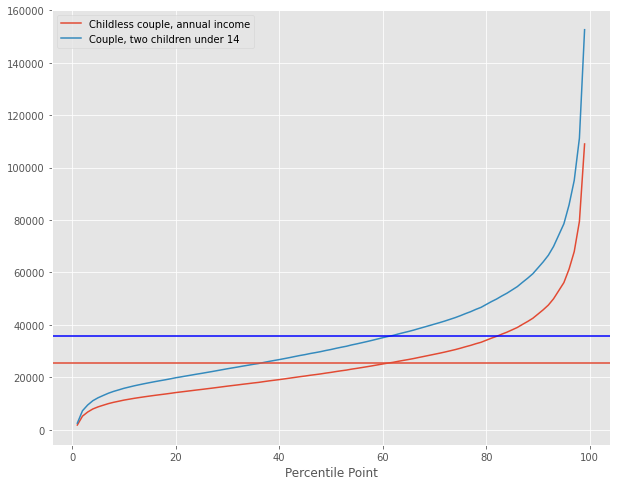

In [ ]:
clean.plot()
plt.axhline(clean['Childless couple, annual income'].mean())
plt.axhline(clean['Couple, two children under 14'].mean(), c = 'b')
# not the same shade of blue 

## Asking more questions of the data
For me, this data starts to beg further questions. How would we answer these?

- If the top 20% of income shows such a sharp increase, how do we know that there isn't a similar uptick *within* the 1%? We've already seen that the meaan of the dataset as a whole is much less than the half the maximum category (it's 25% of the maximum). What if that's true within the 1%, and £2,000/week as a fraction of the 0.1%, or the 0.01%?

- How does this break down for gender, or educational background, or other factors like ethnicity or country of origin?

- Which parts of the income curve show greater gaps between these subgroups and what might it say about the underlying causal mechanisms?


Text(0, 0.5, 'Income Per Week [GBP]')

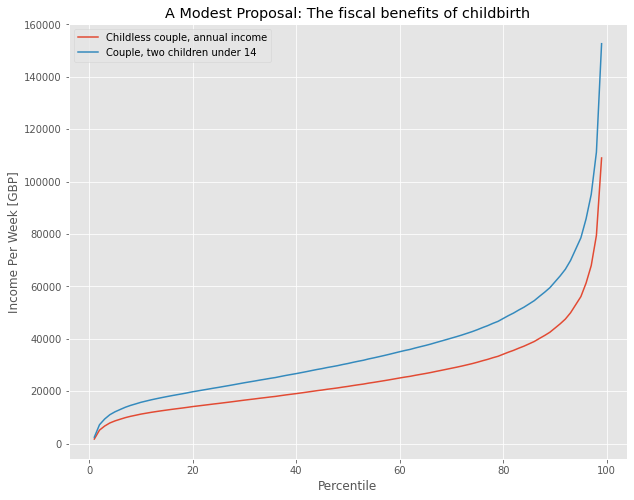

In [ ]:
clean.plot()
plt.title('A Modest Proposal: The fiscal benefits of childbirth')
plt.xlabel('Percentile')
plt.ylabel('Income Per Week [GBP]')

## Exercise: 

Previously, we'd examined income gaps between single people and couples (how very romantic). Repeat the above exercise (cleaning and plotting income data) for the columns we used above for single people and childless couples. Reflect and comment on the differences.

In [ ]:
clean1 = income[['Childless couple, annual income','Single adult']]
clean1.head()


,"Childless couple, annual income",Single adult
Percentile Point,,
1,"1,746.92","1,170.44"
2,"5,141.01","3,444.48"
3,"6,703.11","4,491.09"
4,"7,875.75","5,276.75"
5,"8,671.91","5,810.18"


In [ ]:
clean1=clean1.replace(',', '', regex=True)
clean1 = clean1.replace('-', 'NaN', regex=True).astype('float')
clean1.head()

,"Childless couple, annual income",Single adult
Percentile Point,,
1,1746.92,1170.44
2,5141.01,3444.48
3,6703.11,4491.09
4,7875.75,5276.75
5,8671.91,5810.18


Text(0, 0.5, 'Income Per Week [GBP]')

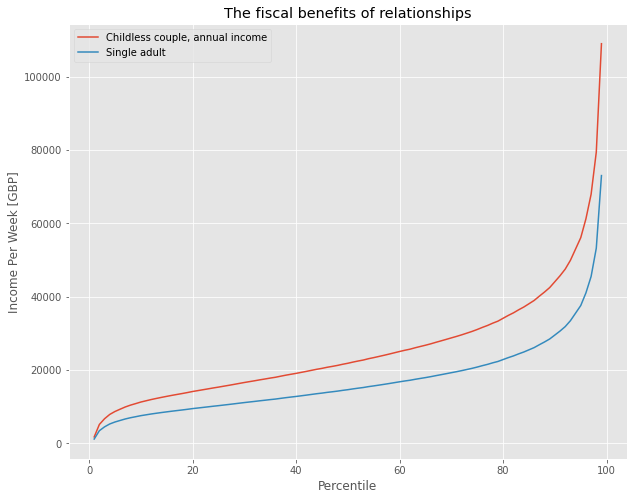

In [ ]:
clean1.plot()
plt.title('The fiscal benefits of relationships')#?
plt.xlabel('Percentile')
plt.ylabel('Income Per Week [GBP]')

Text(0, 0.5, 'Income Per Week [GBP]')

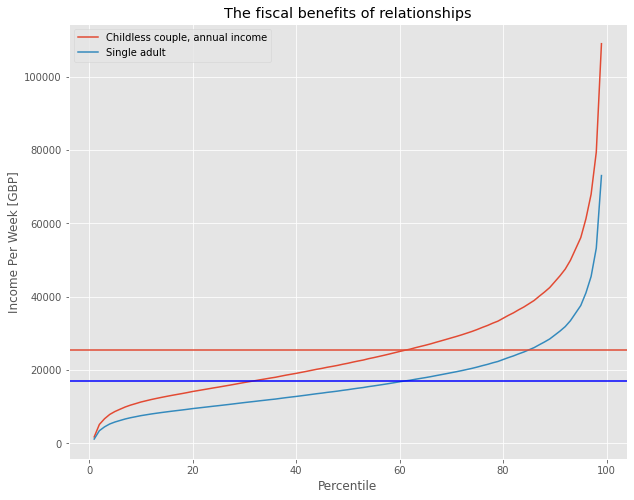

In [ ]:
#adding the means
clean1.plot()
plt.axhline(clean1['Childless couple, annual income'].mean())
plt.axhline(clean1['Single adult'].mean(), c = 'b')
plt.title('The fiscal benefits of relationships')#?
plt.xlabel('Percentile')
plt.ylabel('Income Per Week [GBP]')

In [ ]:
#Add your reflection here.
#It seems like the difference between the income of a single adult and of a childless couple
#is greater than that between a couple with two kids under 14 and a childless couple 
#but the power curve similarity for the top 20% earners remains 
#obvioulsy we lack a lot of information, as mentioned above on the effects of gender, educational backgrounf etc
# but we see there is a very unequal distribution od money in terms of income

## Homework: Selecting data

So far, we've dealt with selecting data in a particular row of column by index or label. What if we now want to filter the data by *value*? For example, let's say I want to see the data for all Childless couples who earn more than 50,000 (net equivalised) pounds every year. This looks like:

In [ ]:
clean = income[['Childless couple, annual income','Couple, two children under 14']]
clean = clean.replace(',', '', regex=True)
clean = clean.replace('-', 'NaN', regex=True).astype('float')
clean[clean['Childless couple, annual income']>50000]

,"Childless couple, annual income","Couple, two children under 14"
Percentile Point,,
94,52993.38,74190.73
95,56088.56,78523.99
96,61237.18,85732.05
97,67925.07,95095.10
98,79425.23,111195.32
99,108990.74,152587.04


The key line of code for selection is: 

```python
clean[clean['Childless couple, annual income']>50000]
```

Let's break this down: we're used to using *dataframe*[*some selection*] from earlier. Here "some selection" is 


```python
clean['Childless couple, annual income']>50000
```

In other words, this command is returning a set of indices where that statement is true. We can see this explicitly:

In [ ]:
clean['Childless couple, annual income']>50000

Percentile Point
1     False
2     False
3     False
4     False
5     False
      ...  
95     True
96     True
97     True
98     True
99     True
Name: Childless couple, annual income, Length: 99, dtype: bool

So python is picking the values where this statement is true - i.e. where the 'Childless couple...' column has values greater than 50000. Then this selection is passed to the dataframe, and the dataframe shows the correct rows.

We won't dwell on comparative operative, here we've used ">" to mean "is greater than"; you can also use:

- == to mean 'is equal to' [why the double equals?]
- <> or != to mean 'is not equal to'
- < to mean 'is less than'
- the symbol >= to mean 'is greater than or equal to'
- <= to mean 'is less than or equal to'


In [ ]:
#we use the double equals because one equal symbol, as we've been seing since last workbook, 
#attributes something to something else 

## Exercise
On an approporiately labelled graph, plot the incomes of all single adults whose net equivalised income is less than or equal to £10,000. What proportion of the population is this?

In [ ]:
clean2 = income[['Single adult']]
clean2=clean2.replace(',', '', regex=True)
clean2 = clean2.replace('-', 'NaN', regex=True).astype('float')
clean2.head()

,Single adult
Percentile Point,
1,1170.44
2,3444.48
3,4491.09
4,5276.75
5,5810.18


Text(0, 0.5, 'Income Per Week [GBP]')

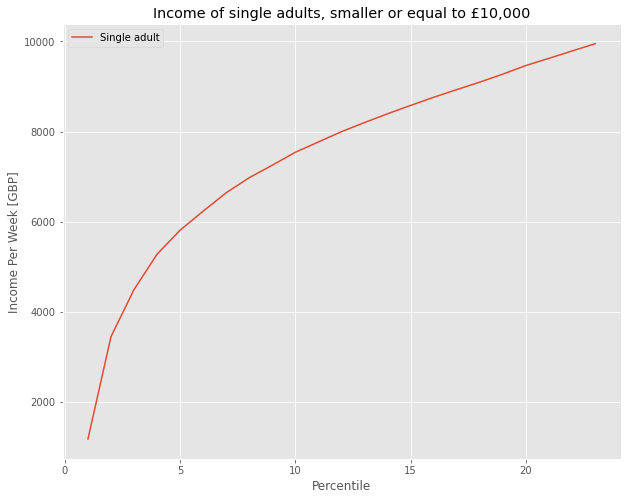

In [ ]:
clean2[clean2 <= 10000].plot()
plt.title('Income of single adults, smaller or equal to £10,000')
plt.xlabel('Percentile')
plt.ylabel('Income Per Week [GBP]')
#so about 24% of the population 